In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Dataset extracted successfully!")


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Garbage_Classification/archive.zip'  # Make sure this matches your actual path
extract_path = '/content/garbage_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import os

# List all folders inside the extracted dataset directory
for folder_name in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder_name)
    print(f"{folder_name} - {'Directory' if os.path.isdir(folder_path) else 'File'}")


TrashType_Image_Dataset - Directory


In [ ]:
dataset_root = os.path.join(extract_path, 'TrashType_Image_Dataset')

# List class subfolders inside the main dataset directory
for class_name in os.listdir(dataset_root):
    class_path = os.path.join(dataset_root, class_name)
    print(f"{class_name} - {'Directory' if os.path.isdir(class_path) else 'File'}")


glass - Directory
trash - Directory
metal - Directory
plastic - Directory
cardboard - Directory
paper - Directory


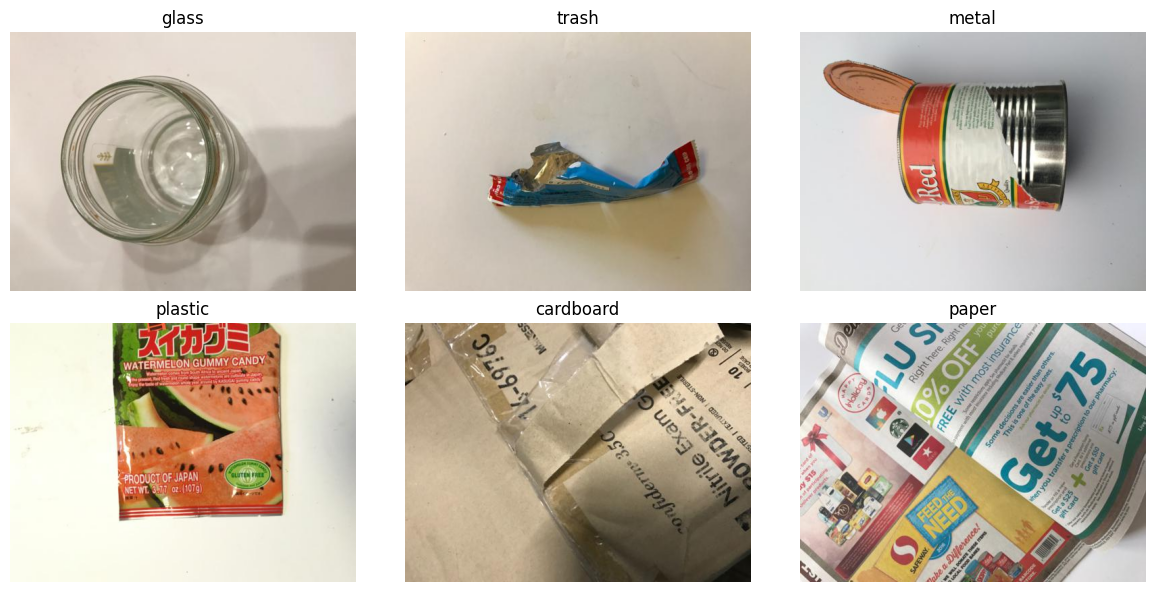

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_classes = os.listdir(dataset_root)

plt.figure(figsize=(12, 6))
for i, cls in enumerate(sample_classes):
    cls_folder = os.path.join(dataset_root, cls)
    sample_image = os.listdir(cls_folder)[0]  # Pick first image
    img_path = os.path.join(cls_folder, sample_image)

    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
# Set image size and batch size
img_size = (128, 128)
batch_size = 32

# Create training and validation generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_root,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.2407 - loss: 1.7244 - val_accuracy: 0.4314 - val_loss: 1.4194
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 999ms/step - accuracy: 0.4533 - loss: 1.3559 - val_accuracy: 0.5368 - val_loss: 1.2355
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 995ms/step - accuracy: 0.5379 - loss: 1.1653 - val_accuracy: 0.5586 - val_loss: 1.1622
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6170 - loss: 0.9877 - val_accuracy: 0.5686 - val_loss: 1.1513
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 990ms/step - accuracy: 0.6775 - loss: 0.8867 - val_accuracy: 0.6461 - val_loss: 0.9915
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7521 - loss: 0.6937 - val_accuracy: 0.5905 - val_loss: 1.2138
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 994ms/step - accuracy: 0.7837 - loss: 0.5959 - val_accuracy: 0.6720 - val_loss: 1.1103
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8084 - loss: 0.5204 - val_accuracy: 0.6600 - val_loss

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.6274 - loss: 1.3236
Validation Accuracy: 0.65


In [ ]:
model.save('/content/garbage_classifier_model.h5')


In [13]:
!cp /content/garbage_classifier_model.h5 /content/drive/MyDrive/Garbage_Classification/Week1/

